# XOR 문제 구현 - 단층 퍼셉트론

### 1. GPU 연산 세팅

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = 'cuda'if torch.cuda.is_available() else 'cpu'
torch.manual_seed(77)
if device == 'cuda' :
    torch.cuda.manual_seed_all(77)

In [3]:
device

'cpu'

### 2. 입출력 정의, 신경망 정의

In [4]:
X = torch.FloatTensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2, 1, bias = True) #nn.Linear() 는 파라미터 (가중치) 초깃값을 랜덤하게 지정. (seed 로 고정함)
print("Random Parameters :\n", list(linear.parameters()))

sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device) # nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있도록 함

Error_func = torch.nn.BCELoss().to(device) # Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

Random Parameters :
 [Parameter containing:
tensor([[-0.2943, -0.3031]], requires_grad=True), Parameter containing:
tensor([-0.1385], requires_grad=True)]


In [5]:
print("딥러닝 모델의 초기 예측값 : \n", model(X))

딥러닝 모델의 초기 예측값 : 
 tensor([[0.4654],
        [0.3914],
        [0.3935],
        [0.3239]], grad_fn=<SigmoidBackward0>)


0 0.7221513390541077
100 0.7221513390541077
200 0.7221513390541077
300 0.7221513390541077
400 0.7221513390541077
500 0.7221513390541077
600 0.7221513390541077
700 0.7221513390541077
800 0.7221513390541077
900 0.7221513390541077
1000 0.7221513390541077
1100 0.7221513390541077
1200 0.7221513390541077
1300 0.7221513390541077
1400 0.7221513390541077
1500 0.7221513390541077
1600 0.7221513390541077
1700 0.7221513390541077
1800 0.7221513390541077
1900 0.7221513390541077
2000 0.7221513390541077
2100 0.7221513390541077
2200 0.7221513390541077
2300 0.7221513390541077
2400 0.7221513390541077
2500 0.7221513390541077
2600 0.7221513390541077
2700 0.7221513390541077
2800 0.7221513390541077
2900 0.7221513390541077
3000 0.7221513390541077
3100 0.7221513390541077
3200 0.7221513390541077
3300 0.7221513390541077
3400 0.7221513390541077
3500 0.7221513390541077
3600 0.7221513390541077
3700 0.7221513390541077
3800 0.7221513390541077
3900 0.7221513390541077
4000 0.7221513390541077
4100 0.7221513390541077
4200

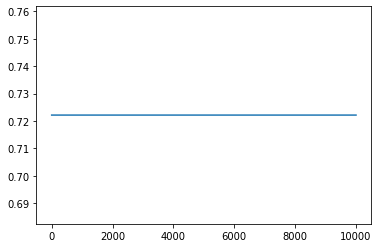

In [6]:
Error_list = []

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    Error = Error_func(hypothesis, Y) # (NN의 Output, 실제값)
    Error_list.append(Error.item())
    Error.backward # 기울기 계산
    optimizer.step() # 기울기 업데이트
    
    if step % 100 == 0:
        print(step, Error.item())

plt.plot(Error_list)

In [7]:
print("심층학습 후 예측값 : \n", hypothesis)

심층학습 후 예측값 : 
 tensor([[0.4654],
        [0.3914],
        [0.3935],
        [0.3239]], grad_fn=<SigmoidBackward0>)


# 2. XOR 문제 구현 - 다층 퍼셉트론

In [8]:
model = nn.Sequential(
            nn.Linear(2, 2, bias = True),
            nn.Sigmoid(),
            nn.Linear(2, 1, bias = True),
            nn.Sigmoid()
            ).to(device)

Error_func = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
print("딥러닝 모델의 초기 예측값 : \n", model(X))

딥러닝 모델의 초기 예측값 : 
 tensor([[0.5278],
        [0.5246],
        [0.5218],
        [0.5183]], grad_fn=<SigmoidBackward0>)


0 0.6940639019012451
100 0.6925187706947327
200 0.6910218000411987
300 0.6805886030197144
400 0.5227653384208679
500 0.15272587537765503
600 0.06794840097427368
700 0.041773755103349686
800 0.029749326407909393
900 0.02296537160873413
1000 0.01864388957619667
1100 0.01566304638981819
1200 0.013488399796187878
1300 0.011834666132926941
1400 0.010536274872720242
1500 0.009490580298006535
1600 0.008631051518023014
1700 0.007912230677902699
1800 0.0073025464080274105
1900 0.006778954528272152
2000 0.006324637681245804
2100 0.005926709156483412
2200 0.005575357936322689
2300 0.0052628787234425545
2400 0.004983271937817335
2500 0.004731536842882633
2600 0.004503835458308458
2700 0.004296782426536083
2800 0.004107820801436901
2900 0.003934620879590511
3000 0.003775319317355752
3100 0.0036282939836382866
3200 0.003492192830890417
3300 0.003365875454619527
3400 0.003248291090130806
3500 0.0031385542824864388
3600 0.003036005422472954
3700 0.0029398195911198854
3800 0.002849561395123601
3900 0.0

Text(0, 0.5, 'Error')

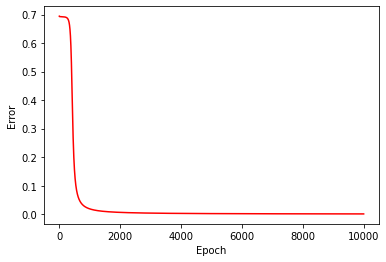

In [9]:
Error_list = []

for epoch in range(10001):
    optimizer.zero_grad()
    
    hypothesis = model(X)
    
    Error = Error_func(hypothesis, Y)
    Error.backward()
    Error_list.append(Error.item())
    optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch, Error.item())

plt.plot(Error_list, color = 'red')
plt.xlabel("Epoch")
plt.ylabel("Error")

In [10]:
print(list(model.named_parameters()))

[('0.weight', Parameter containing:
tensor([[-7.5944,  7.8369],
        [-7.5147,  7.2549]], requires_grad=True)), ('0.bias', Parameter containing:
tensor([ 3.7900, -3.8227], requires_grad=True)), ('2.weight', Parameter containing:
tensor([[-14.5927,  15.1431]], requires_grad=True)), ('2.bias', Parameter containing:
tensor([6.9712], requires_grad=True))]


In [11]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: 0.weight | Size: torch.Size([2, 2]) | Values : tensor([[-7.5944,  7.8369],
        [-7.5147,  7.2549]], grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([2]) | Values : tensor([ 3.7900, -3.8227], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([1, 2]) | Values : tensor([[-14.5927,  15.1431]], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([1]) | Values : tensor([6.9712], grad_fn=<SliceBackward0>) 



In [12]:
print("딥러닝 학습 후 에측값 : \n", model(X))
print((model(X) > 0.5).float())

딥러닝 학습 후 에측값 : 
 tensor([[9.3409e-04],
        [9.9913e-01],
        [9.9871e-01],
        [8.1125e-04]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
